Metaorder 0: Price Difference = 0.40, EFF = 0.32, EFFS = 0.13
Metaorder 1: Price Difference = 0.98, EFF = 0.55, EFFS = 0.54
Metaorder 2: Price Difference = 2.24, EFF = 0.59, EFFS = 1.32
Metaorder 3: Price Difference = 1.87, EFF = 0.68, EFFS = 1.28
Metaorder 4: Price Difference = -0.98, EFF = 0.77, EFFS = -0.76
Metaorder 5: Price Difference = 0.95, EFF = 0.66, EFFS = 0.63
Metaorder 6: Price Difference = -0.15, EFF = 0.80, EFFS = -0.12
Metaorder 7: Price Difference = -0.10, EFF = 0.86, EFFS = -0.09
Metaorder 8: Price Difference = 0.41, EFF = 0.72, EFFS = 0.30
Metaorder 9: Price Difference = 0.14, EFF = 0.67, EFFS = 0.10
Metaorder 10: Price Difference = 1.45, EFF = 0.52, EFFS = 0.76
Metaorder 11: Price Difference = 0.76, EFF = 0.32, EFFS = 0.24
Metaorder 12: Price Difference = 0.12, EFF = 0.43, EFFS = 0.05
Metaorder 13: Price Difference = 0.44, EFF = 0.38, EFFS = 0.17
Metaorder 14: Price Difference = 0.33, EFF = 0.33, EFFS = 0.11
Metaorder 15: Price Difference = 1.49, EFF = 0.24, EFFS = 0

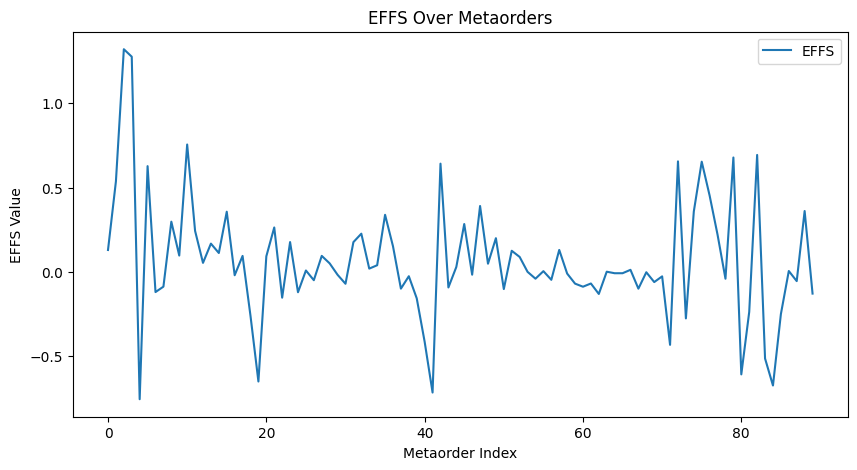

In [24]:
import numpy as np

#Generating dummy data 
np.random.seed(25)
num_metaorders = 100
decision_prices = np.cumsum(np.random.normal(0, 1, num_metaorders))  #Arrival prices
metaorder_sizes = np.random.normal(0, 1, num_metaorders)  #Random size of the meta order

N = 10  #time steps

#Difference in arrival prices
price_differences = np.diff(decision_prices)

#calculating EFF
def estimate_eff(metaorder_sizes, N):
    eff = []
    for i in range(len(metaorder_sizes) - N):
        future_flow = np.mean(metaorder_sizes[i+1:i+N+1])
        eff.append(future_flow)
    return np.array(eff)

eff = estimate_eff(metaorder_sizes, N)

#computing EFFS
effs = price_differences[:len(eff)] * eff

#Printing the data
for i in range(len(effs)):
    print(f"Metaorder {i}: Price Difference = {price_differences[i]:.2f}, EFF = {eff[i]:.2f}, EFFS = {effs[i]:.2f}")

#Visiualization 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(effs, label='EFFS')
plt.xlabel('Metaorder Index')
plt.ylabel('EFFS Value')
plt.title('EFFS Over Metaorders')
plt.legend()
plt.show()

